In [ ]:
#pip install termcolor
!pip install scorecardpy

     |████████████████████████████████| 55 kB 2.1 MB/s 
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.2-py3-none-any.whl size=57843 sha256=6417196049957ce1b78a389ee6afc810ee20814fa4d08ed2dadae2d83a017e12
  Stored in directory: /root/.cache/pip/wheels/9d/50/52/715367c478fd2e2317070ccf6539b2c29fc8168144cfbfaeac
Successfully built scorecardpy


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from termcolor import colored
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
#import scorecardpy as sc
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import RandomForestClassifier
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/DATA _SCV/Bondora_preprocessed.csv')

In [ ]:
df.head(5)

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,VerificationType,LanguageCode,...,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Default,year
0,0,0,115.0410,New_credit_Customer,2009-06-16,2009-07-27,2010-06-25,2010-06-25,Income_unverified_crossref_phone,Estonian,...,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,0,2009
1,0,0,140.6057,Existing_credit_customer,2009-06-15,2009-07-15,2009-07-15,2009-07-15,Income_unverified_crossref_phone,Estonian,...,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,0,2009
2,0,0,319.5580,New_credit_Customer,2009-06-15,2009-07-27,2011-02-25,2014-05-13,Income_unverified_crossref_phone,Estonian,...,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,1,2009
3,0,0,57.5205,New_credit_Customer,2009-06-15,2009-07-15,2010-09-15,2010-09-15,Income_unverified_crossref_phone,Estonian,...,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,0,2009
4,0,0,319.5582,New_credit_Customer,2009-06-14,2009-07-27,2010-06-25,2010-06-25,Income_unverified_crossref_phone,Estonian,...,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,0,2009


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77394 entries, 0 to 77393
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NewCreditCustomer                       77394 non-null  object 
 1   Age                                     77394 non-null  int64  
 2   Gender                                  77349 non-null  object 
 3   Amount                                  77394 non-null  float64
 4   Interest                                77394 non-null  float64
 5   LoanDuration                            77394 non-null  int64  
 6   MonthlyPayment                          70767 non-null  float64
 7   Education                               77349 non-null  object 
 8   MaritalStatus                           77349 non-null  object 
 9   EmploymentStatus                        77197 non-null  object 
 10  EmploymentDurationCurrentEmployer       76520 non-null  ob

In [ ]:
df=df[['NewCreditCustomer','Age',
       'Gender','Amount', 'Interest', 'LoanDuration', 'MonthlyPayment',
       'Education', 'MaritalStatus','EmploymentStatus',
       'EmploymentDurationCurrentEmployer',
      'IncomeTotal','DebtToIncome','Restructured',
       'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan','PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'Default']]

# EDA


## Univariate analysis

In [ ]:
def pie_chart(data,column,b):
  specs=np.array([[{'type':'domain'}, {'type':'domain'}]]*b)
  specs=specs.reshape(2,-1).tolist()

  fig = make_subplots(rows=2, cols=b, specs=specs,subplot_titles=([i+'_pie chart' for i in column]))
  for i, v in enumerate(column):
    pie=df.groupby(v).Default.count()
    fig.add_trace(go.Pie(labels=np.array(pie.index).tolist(), values=np.array(pie.values).tolist(),hole=.2), 1, i+1)

  fig.update_annotations(font_size=13)
  fig.update_layout(margin=dict(l=0, r=0, t=300, b=0),autosize=False,height = 900, width = 1500,uniformtext_minsize=8, uniformtext_mode='hide',showlegend=True)
  fig.update_traces(textposition='inside')
  fig.show()


By clicking into the pie chart, information about the percentage of each part will be presented on screen

In [ ]:
pie_chart(df,['Education','Gender','MaritalStatus','Default'],4)


In [ ]:
#@title
def draw_pie_chart(data,column,a,b):
    fig,ax1=plt.subplots(a,b,figsize=(12,12))
    ax1 = ax1.ravel()
    for i,v in enumerate(column):
        per=data.groupby(v).Default.count().sort_values(ascending=False)/data.shape[0]
        per=per[per>=0.01]
        ax=per.plot(kind='pie',ax=ax1[i],fontsize=9,startangle=90,autopct=lambda x: '{:.1f}%'.format(round(x)) if x > 0 else '' )
        ax.set_title(f'Percentage of {v}',fontsize=10)
        ax.set_ylabel(None)
        plt.tight_layout()
        plt.plot()        


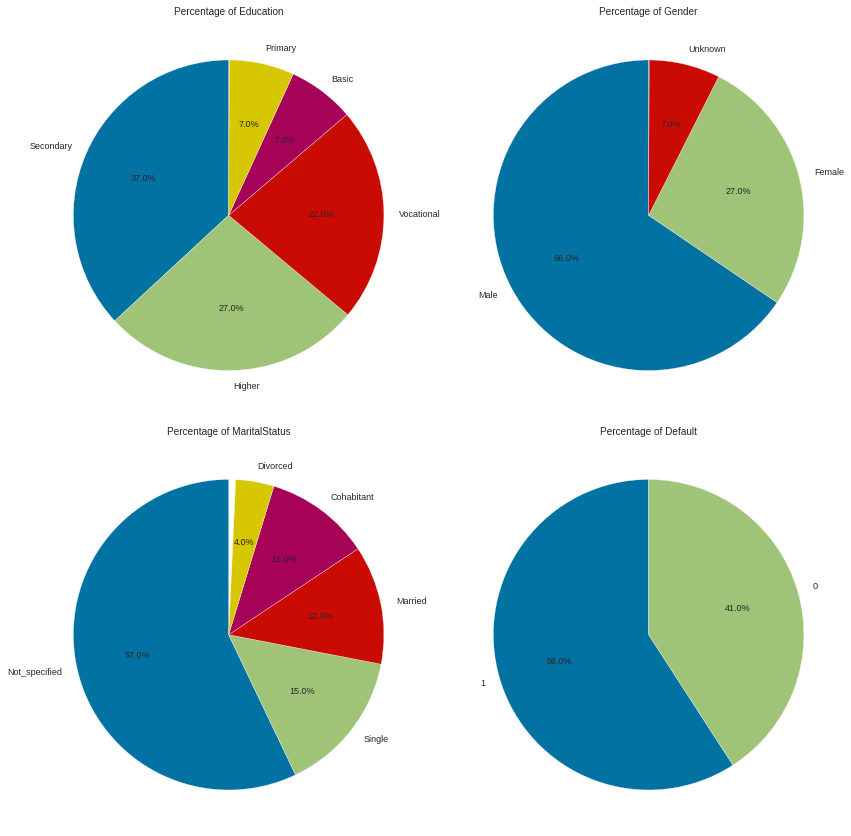

In [ ]:
#@title
draw_pie_chart(df,['Education','Gender','MaritalStatus','Default'],2,2)

In [ ]:
def bar_chart(data,column,b):
  fig = make_subplots(rows=b, cols=1, subplot_titles=([i+'_bart chart' for i in column]))
  for i, v in enumerate(column):
    bar=pd.DataFrame(df.groupby(v).Default.count().sort_values(ascending=False)).reset_index()
    fig1 = px.bar(bar, x = v, y = "Default",text_auto='%.1')
    for trace in fig1.data:
      fig.add_trace(trace, i+1,1)
  fig.update_layout(height = 1500, width = 1000)
  fig.show()


In [ ]:
bar_chart(df,['EmploymentStatus','EmploymentDurationCurrentEmployer','NewCreditCustomer'],3)


* 59% of the loans are default and 41% of loan are non-default

* 66% of the loan applicants are male and 27% of that are female.=> Females are more than male

* Nearly 40% have a secondary education while approximately 30% have a higher education, around 22% is Vocational => Most of customer have education level higher than primary level

* Most of customers are new credit customer who fully employed or not specified with employlemnt duration more than 5 years

* There also no imbalenced data problem


In [ ]:
#@title
# def draw_bar_chart(data,column,a,b):
#     fig,ax1=plt.subplots(a,b,figsize=(20,10))
#     ax1 = ax1.ravel()
#     for i,v in enumerate(column):
#         per=data.groupby(v).Default.count().sort_values(ascending=False)
#         ax=per.plot(kind='bar',ax=ax1[i], fontsize=10,color='y')
#         ax.set_title(f'Bar chart of {v}',fontsize=20)
#         ax.set_ylabel(None)
#         plt.tight_layout()
#         plt.plot
        

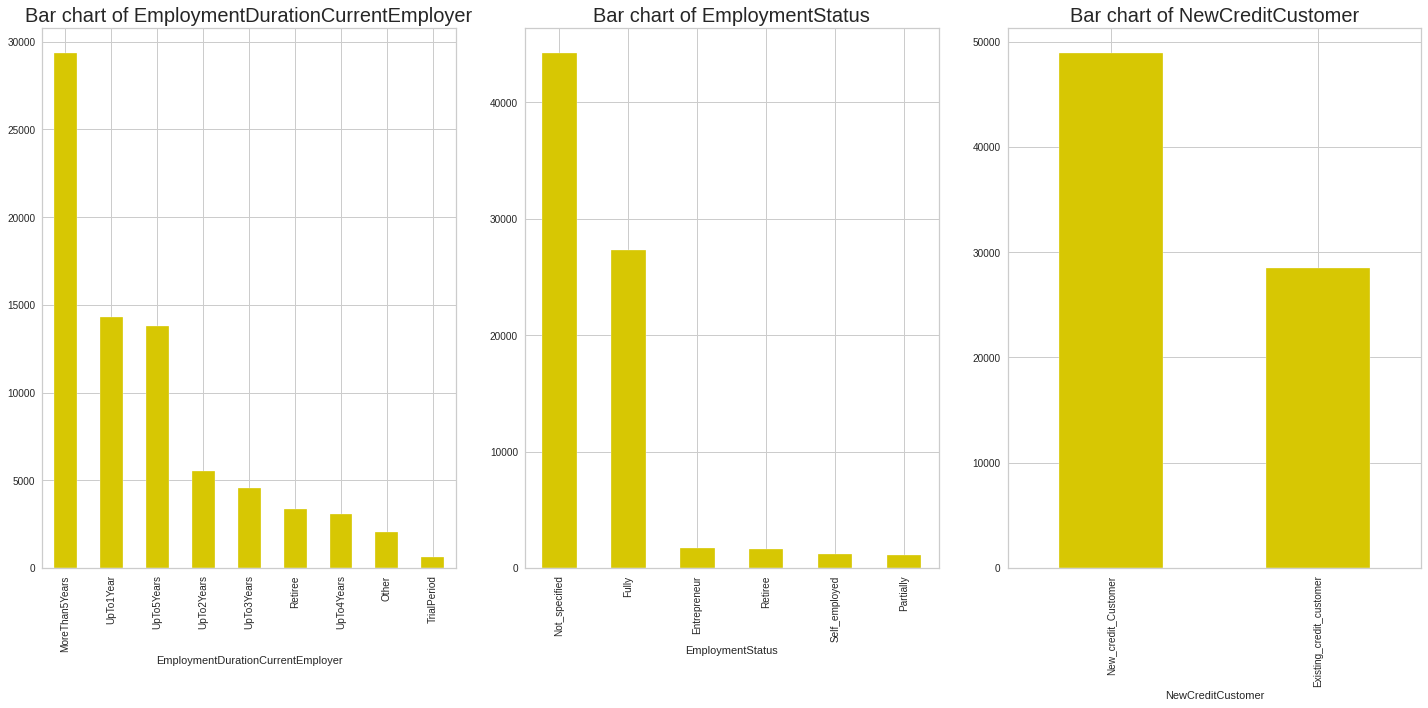

In [ ]:
#@title
# draw_bar_chart(df,['EmploymentDurationCurrentEmployer','EmploymentStatus','NewCreditCustomer'],1,3)

## Bivariate analysis

In [ ]:
def count_bar_chart(data,column,b):
  fig = make_subplots(rows=b, cols=1, subplot_titles=([i+'_bart chart' for i in column]))
  for i, v in enumerate(column):
    bar1=pd.DataFrame(data.groupby(v).Default.value_counts(normalize=True)).rename(columns={'Default':'count'}).reset_index()
    fig1 = px.bar(bar1, x = v, y = "count", color="Default",text_auto='.2%')
    for trace in fig1.data:
      fig.add_trace(trace, i+1,1)
  fig.update_layout(height = 1500, width = 1000,barmode="stack",showlegend=True)

  fig.show()


In [ ]:
count_bar_chart(df,['Gender','Education','MaritalStatus','Restructured'],4)

* Males are likely to default more than female
* The higher education level, the less likely to default but "not present shows the least ability to default" => bank show pay attention to this kind to customers
* Defaul probability can be said to not be affected by Marital status
* Those with "yes" in restructured seems to have impact on Default field. 

In [ ]:
#@title
# def draw_count_chart(data,column,target,a,b,color):
#     fig,ax1=plt.subplots(a,b,figsize=(15,10))
#     ax1 = ax1.ravel()
#     for i,v in enumerate(column):
#         order_to_plot=data[v].value_counts().sort_values(ascending=False).index
#         ax=sns.countplot(x=v,hue=target,data=data,ax=ax1[i],palette=color,order=order_to_plot)
#         ax.set_title(f'Count plot of {v}',fontsize=10)
#         ax.set_ylabel(v)
#         plt.tight_layout()
#         plt.plot
        

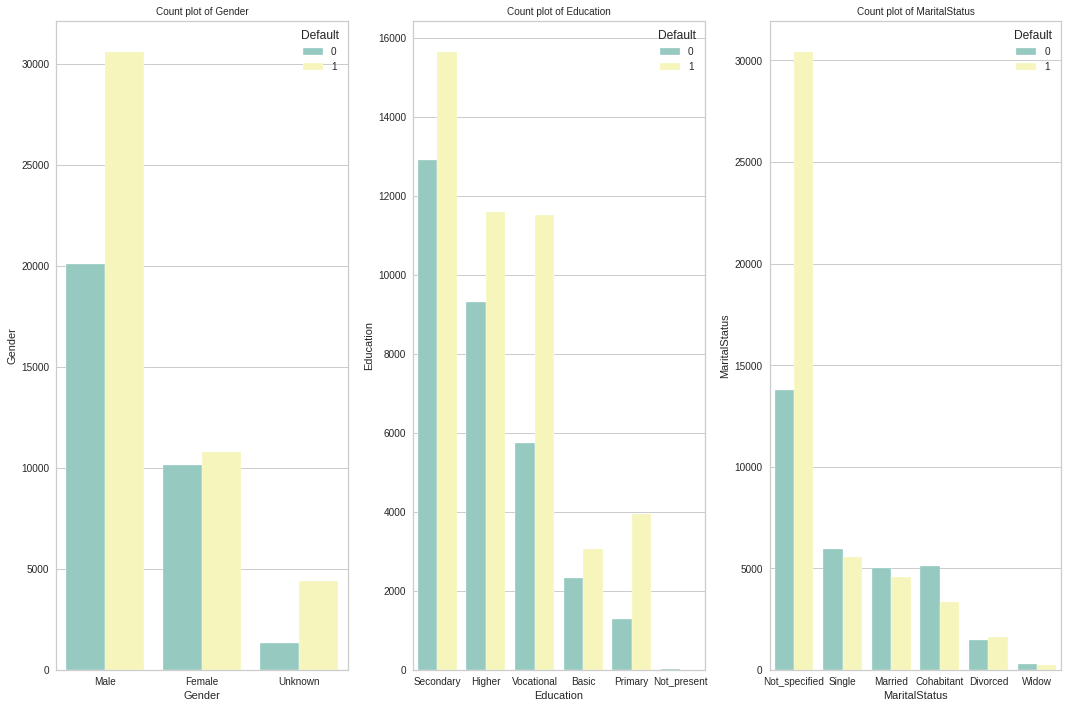

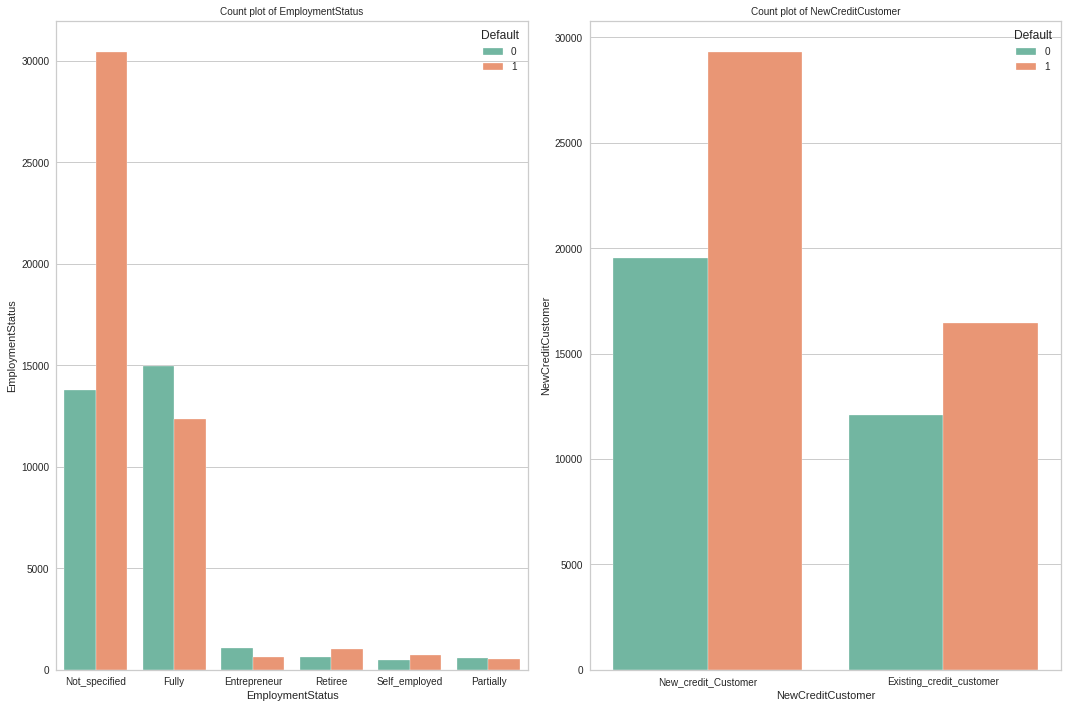

In [ ]:
#@title
# draw_count_chart(df,['Gender','Education','MaritalStatus'],'Default',1,3,'Set3')
# draw_count_chart(df,['EmploymentStatus','NewCreditCustomer'],'Default',1,2,'Set2')

# DATA CLEANING

## Convert categorical analysis

In [ ]:
a=pd.DataFrame(df.dtypes).rename(columns={0:'type'})
a[a.type=='object']

,type
NewCreditCustomer,object
Gender,object
Education,object
MaritalStatus,object
EmploymentStatus,object
EmploymentDurationCurrentEmployer,object
Restructured,object


In [ ]:
cat_var_for_Label_encoder=['NewCreditCustomer','EmploymentDurationCurrentEmployer','Restructured']
for cat in cat_var_for_Label_encoder:
    trans=LabelEncoder()
    df[cat]=trans.fit_transform(df[cat].astype('str'))

## Handling missing values

We will see which columns have null values and based on this information we will calculate the percentage of outliers of those columns and make decision on filling null values by mean or median. We will:
*  Fill mean if outlier percentage <5%  

*  Fill median if the percentage >=5%

*   With numeric columns having null values, we will check outlier to decide which fill method we will use

*   With categorial columns having null values, we will fill by mode


In [ ]:
def columns_with_null(data):
    Null_values=pd.DataFrame(data.isnull().sum()).rename(columns={0:'NoOfNullValue'})
    return Null_values[Null_values.NoOfNullValue>0]

In [ ]:
def outlier_percentage_of_numeric_column(data,column):
    dictionary={}
    for i,v in enumerate(column):
        q1,q3=data.describe()[v][4],data.describe()[v][6]
        IQR=q3-q1
        dictionary[v]=data[(data[v]>q3+1.5*IQR) & (data[v]>q3+1.5*IQR)].shape[0]/df[v].shape[0]*100
    return pd.DataFrame.from_dict(data=dictionary,orient='index',columns=['Percentage  outlier'])

In [ ]:
columns_with_null(df)

,NoOfNullValue
Gender,45
MonthlyPayment,6627
Education,45
MaritalStatus,45
EmploymentStatus,197
DebtToIncome,45
PreviousRepaymentsBeforeLoan,19316


In [ ]:
outlier_percentage_of_numeric_column(df,['MonthlyPayment','DebtToIncome','PreviousRepaymentsBeforeLoan'])


,Percentage outlier
MonthlyPayment,4.296199
DebtToIncome,6.280849
PreviousRepaymentsBeforeLoan,10.901362


In [ ]:
#FILLING FOR NUMERIC VARIABLE

df['MonthlyPayment']=df['MonthlyPayment'].fillna(df['MonthlyPayment'].mean())
df['DebtToIncome']=df['DebtToIncome'].fillna(df['DebtToIncome'].median())
df['PreviousRepaymentsBeforeLoan']=df['PreviousRepaymentsBeforeLoan'].fillna(df['PreviousRepaymentsBeforeLoan'].median())



In [ ]:
#FILLING FOR CATEGORICAL VARIABLE

df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Education']=df['Education'].fillna(df['Education'].mode()[0])
df['MaritalStatus']=df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0])
df['EmploymentStatus']=df['EmploymentStatus'].fillna(df['EmploymentStatus'].mode()[0])



In [ ]:
df.isnull().sum()

NewCreditCustomer                         0
Age                                       0
Gender                                    0
Amount                                    0
Interest                                  0
LoanDuration                              0
MonthlyPayment                            0
Education                                 0
MaritalStatus                             0
EmploymentStatus                          0
EmploymentDurationCurrentEmployer         0
IncomeTotal                               0
DebtToIncome                              0
Restructured                              0
NoOfPreviousLoansBeforeLoan               0
AmountOfPreviousLoansBeforeLoan           0
PreviousRepaymentsBeforeLoan              0
PreviousEarlyRepaymentsCountBeforeLoan    0
Default                                   0
dtype: int64

## Handling outlier

After plot boxplot of data, there are several columns with noticable amount of outlier as shown below. There shows that, most of them are skew and there has extreme outlier

=> Finally we drop some extreme outlier not all out of the dataframe because these ouliers maybe contain some important information

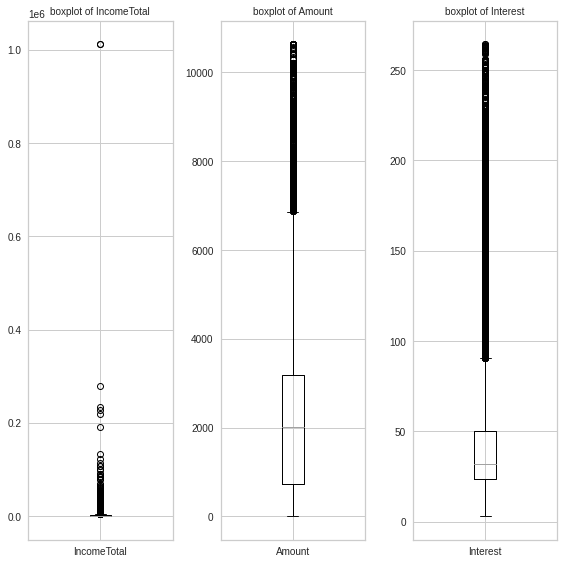

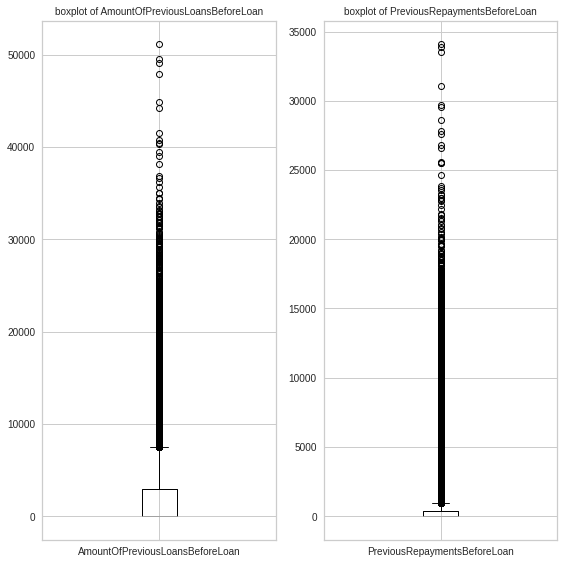

In [ ]:
def boxplot(data,column,a,b):
    fig,axs=plt.subplots(a,b,figsize=(8,8))
    axs = axs.ravel()
    for i,v in enumerate(column):
        b=data.boxplot(column=v,ax=axs[i])
        b.set_title(f'boxplot of {v}',fontsize=10)
        plt.tight_layout()      
        plt.plot
boxplot(df,['IncomeTotal','Amount','Interest'],1,3)
boxplot(df,['AmountOfPreviousLoansBeforeLoan','PreviousRepaymentsBeforeLoan'],1,2)

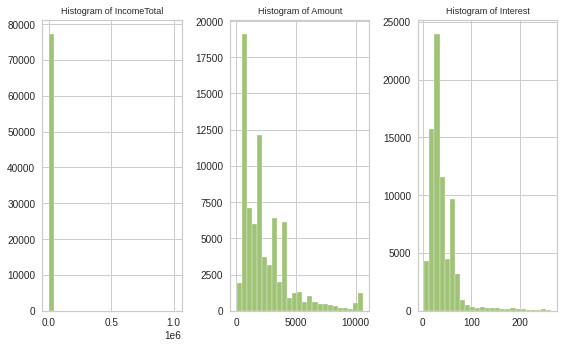

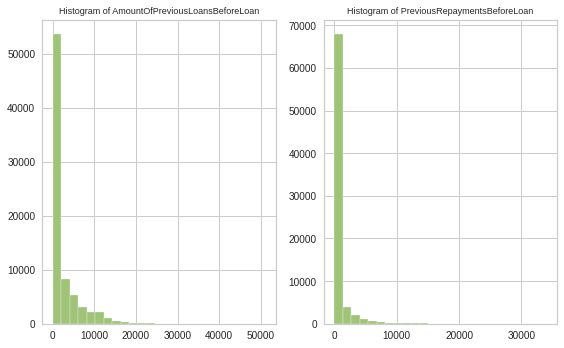

In [ ]:
def histogram(data,column,a,b):
    fig,axs=plt.subplots(a,b,figsize=(8,5))
    axs = axs.ravel()
    for i,v in enumerate(column):
        g=df[v].hist(bins=25,ax=axs[i],color='g')
        g.set_title(f'Histogram of {v}',fontsize=9)
        plt.tight_layout()      
        plt.plot
histogram(df,['IncomeTotal','Amount','Interest'],1,3)
histogram(df,['AmountOfPreviousLoansBeforeLoan','PreviousRepaymentsBeforeLoan'],1,2)

In [ ]:
df=df[df.IncomeTotal<=800000]
df=df[df.AmountOfPreviousLoansBeforeLoan<=45000]
df=df[df.PreviousRepaymentsBeforeLoan<=30000]
# df=df[df.Amount<=10000]
# df=df[df.Interest<=250]

# FEATURES SELECTION BY WOE

In [ ]:
infor=sc.iv(df, y="Default")

In [ ]:
infor

,variable,info_value
4,MonthlyPayment,0.986355
14,Interest,0.645816
9,LoanDuration,0.452407
1,IncomeTotal,0.413681
2,DebtToIncome,0.405492
13,Amount,0.398936
12,MaritalStatus,0.227774
15,EmploymentStatus,0.227690
6,AmountOfPreviousLoansBeforeLoan,0.175444
5,PreviousRepaymentsBeforeLoan,0.157405


In [ ]:
df1 = sc.var_filter(df, y="Default")

[INFO] filtering variables ...
Variable filtering on 77384 rows and 19 columns in 00:01:19 
3 variables are removed


[INFO] creating woe binning ...
Binning on 77384 rows and 16 columns in 00:00:13


{'Age': <Figure size 576x396 with 2 Axes>,
 'Amount': <Figure size 576x396 with 2 Axes>,
 'AmountOfPreviousLoansBeforeLoan': <Figure size 576x396 with 2 Axes>,
 'DebtToIncome': <Figure size 576x396 with 2 Axes>,
 'Education': <Figure size 576x396 with 2 Axes>,
 'EmploymentDurationCurrentEmployer': <Figure size 576x396 with 2 Axes>,
 'EmploymentStatus': <Figure size 576x396 with 2 Axes>,
 'Gender': <Figure size 576x396 with 2 Axes>,
 'IncomeTotal': <Figure size 576x396 with 2 Axes>,
 'Interest': <Figure size 576x396 with 2 Axes>,
 'LoanDuration': <Figure size 576x396 with 2 Axes>,
 'MaritalStatus': <Figure size 576x396 with 2 Axes>,
 'MonthlyPayment': <Figure size 576x396 with 2 Axes>,
 'PreviousRepaymentsBeforeLoan': <Figure size 576x396 with 2 Axes>,
 'Restructured': <Figure size 576x396 with 2 Axes>}

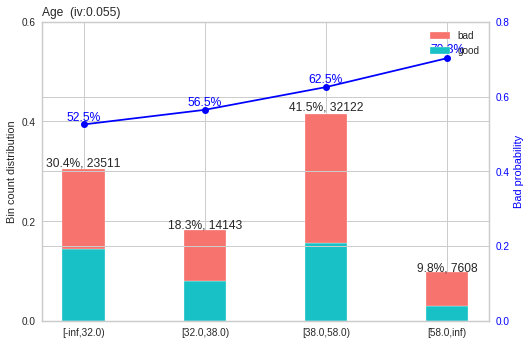

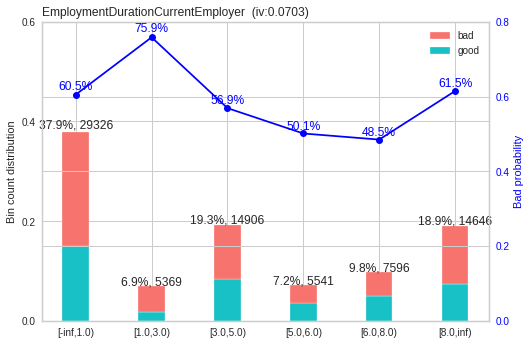

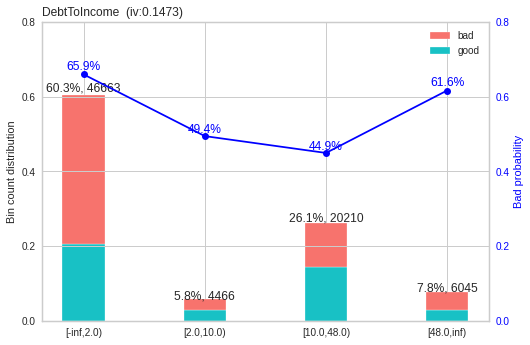

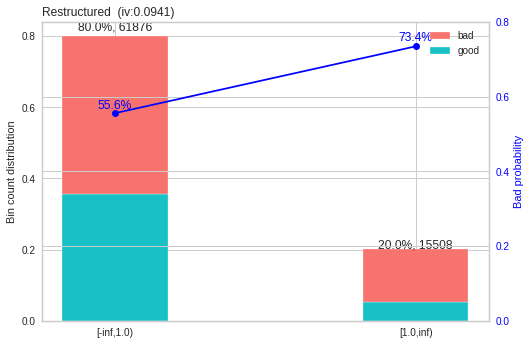

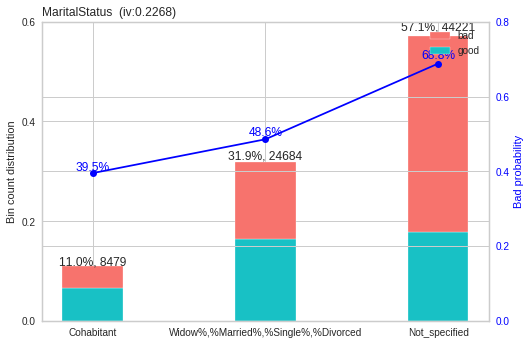

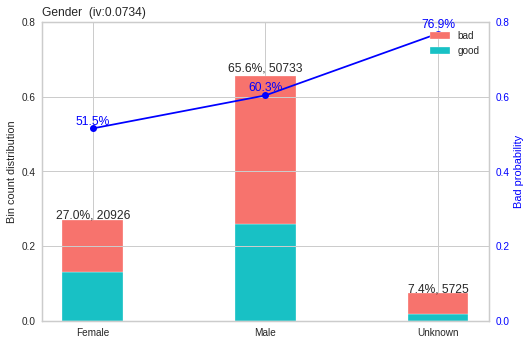

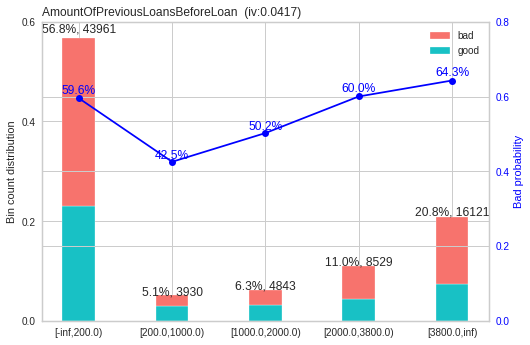

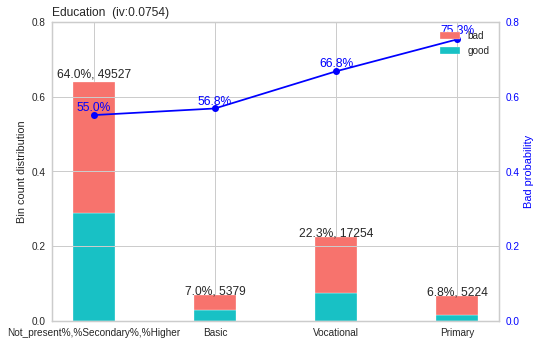

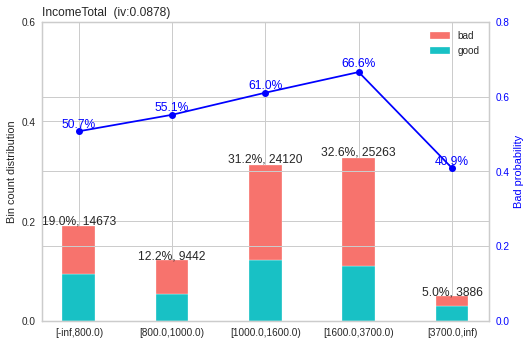

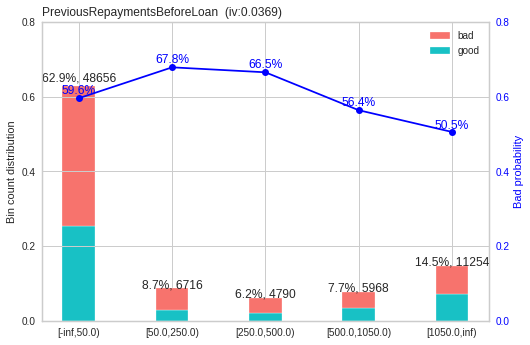

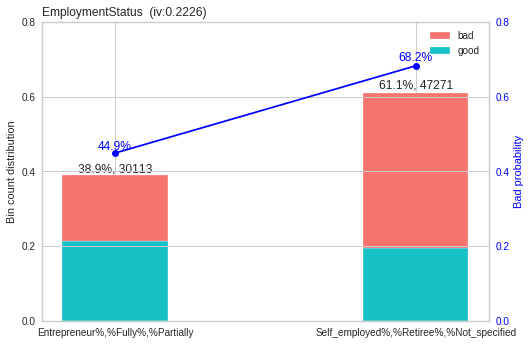

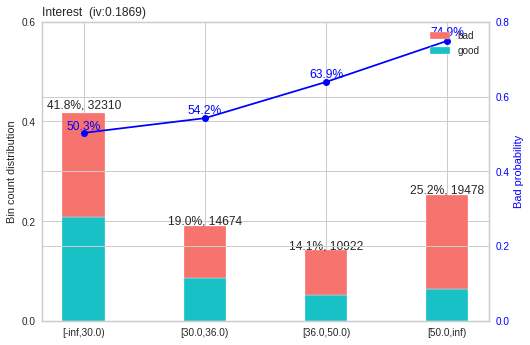

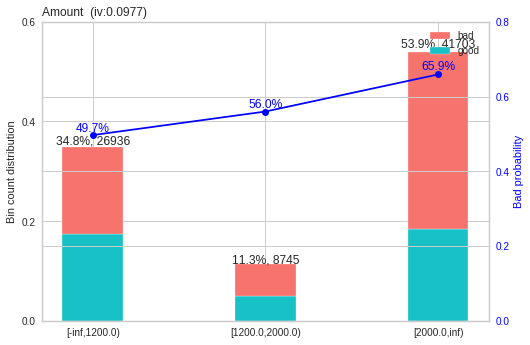

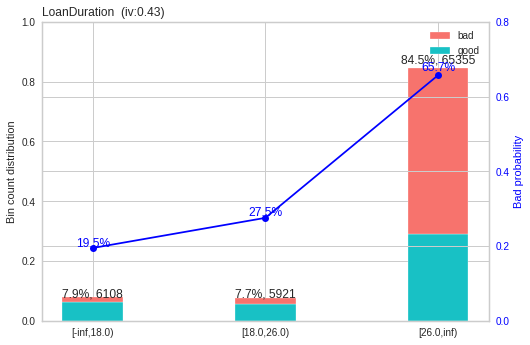

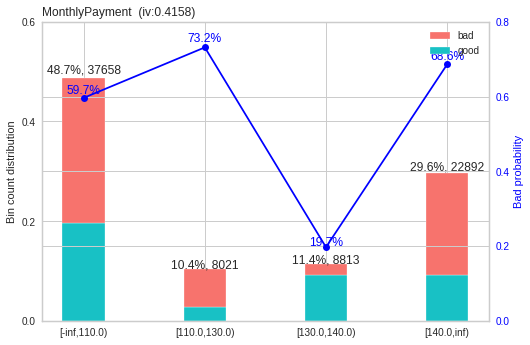

In [ ]:
# woe binning ------
bins = sc.woebin(df1, y="Default")
sc.woebin_plot(bins)

# DATA SPLITTING

## Splitting for normal data

In [ ]:
# Convert categorical with one hot encoding before scaler
df['Gender']=df['Gender'].replace({'Unknown':-1,'Male':0,'Female':1})
df['Education']=df['Education'].replace({'Not_present':-1,'Primary':0,'Basic':1,'Secondary':2,'Higher':3,'Vocational':4})
df['MaritalStatus']=df['MaritalStatus'].replace({'Not_specified':-1,'Single':0,'Married':1,'Cohabitant':2,'Divorced':3,'Widow':4})
df['EmploymentStatus']=df['EmploymentStatus'].replace({'Not_specified':-1,'Self_employed':0,'Fully':1,'Partially':2,'Entrepreneur':3,'Retiree':4})


In [ ]:
Y_normal = df["Default"]
X_normal = df.drop(["Default"], axis=1)

X_train_normal, X_test_normal , y_train_normal, y_test_normal =  train_test_split(X_normal,Y_normal, test_size=0.4, random_state=42)

## Splitting for WOE data

In [ ]:
train_Woe, test_Woe  = train_test_split(df1,test_size=0.4, random_state=42)

In [ ]:
train_woe = sc.woebin_ply(train_Woe, bins)
test_woe = sc.woebin_ply(test_Woe, bins)

y_train_woe = train_woe.loc[:,'Default']
X_train_woe = train_woe.loc[:,train_woe.columns != 'Default']
y_test_woe = test_woe.loc[:,'Default']
X_test_woe = test_woe.loc[:,train_woe.columns != 'Default']

[INFO] converting into woe values ...
[INFO] converting into woe values ...


# MODELING 

## LOGISTIC

In [ ]:
def logistic_model(x_train,Y_train,x_test):
    logis = LogisticRegression(random_state=0).fit(x_train, Y_train)
    return logis.predict(x_test)


## DECISION TREE

In [ ]:
def decision_tree_before_tuning(x_train,Y_train,x_test):
    clf_model = DecisionTreeClassifier()   
    clf_model.fit(x_train,Y_train)
    y_pred = clf_model.predict(x_test)
    return y_pred

In [ ]:
def get_best_param_AFTER_tuning(x_train,Y_train):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import GridSearchCV
    clf = GridSearchCV(DecisionTreeClassifier(),{'criterion':['gini','entropy'], 'splitter':['best','random'], 'max_depth':[i for i in range(5,50,10)], 
                                                 'min_samples_split':[i for i in range(2,10,4)], 'min_samples_leaf':[i for i in range(1,5,2)]})
    clf.fit(x_train, Y_train)
    return clf.best_params_

In [ ]:
def decision_tree_after_tuning(x_train,Y_train,x_test):
    clf_model = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf= 3,min_samples_split= 6,splitter= 'best')   
    clf_model.fit(x_train,Y_train)
    y_pred = clf_model.predict(x_test)
    return y_pred

In [ ]:
get_best_param_AFTER_tuning(X_train_normal,y_train_normal)

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'splitter': 'best'}

## RANDOM FOREST

In [ ]:
def random_forest(x_train,Y_train,x_test):
    clf = RandomForestClassifier(random_state=0)
    clf.fit(x_train,Y_train)
    y_pred=clf.predict(x_test)
    return y_pred

# RESULT OF MODELS 

## Accurancy, F1,Precision, Recall scocre

In [ ]:
def metrics(y_pred,Y_test):
      from sklearn import metrics
      print('Accurancy:', accuracy_score(Y_test,y_pred))
      print('precision:', precision_score(Y_test,y_pred,average='weighted'))
      print('Recall:', recall_score(Y_test,y_pred,average='weighted'))
      print('f1:', f1_score(Y_test,y_pred,average='weighted'))


## LOGISTIC

In [ ]:
print(colored('Result of Normal Logistic', 'blue', attrs=['bold']))
metrics(logistic_model(X_train_normal,y_train_normal,X_test_normal),y_test_normal)
print(colored('Result of Logistic with WOE', 'blue', attrs=['bold']))
metrics(logistic_model(X_train_woe,y_train_woe,X_test_woe),y_test_woe)

Result of Normal Logistic
Accurancy: 0.655359565807327
precision: 0.6611867716497944
Recall: 0.655359565807327
f1: 0.6157225462911154
confusion ON TEST set: [[ 3722  8886]
 [ 1782 16564]]
Result of Logistic with WOE
Accurancy: 0.707824513794663
precision: 0.7057516144839495
Recall: 0.707824513794663
f1: 0.6971888841731202
confusion ON TEST set: [[ 6357  6251]
 [ 2793 15553]]


## DECISION TREE

In [ ]:
print(colored('Result of Decision Tree BEFORE tuning', 'blue', attrs=['bold']))
metrics(decision_tree_before_tuning(X_train_normal,y_train_normal,X_test_normal),y_test_normal)
print(colored('Result of Decision Tree AFTER tuning', 'blue', attrs=['bold']))
metrics(decision_tree_after_tuning(X_train_normal,y_train_normal,X_test_normal),y_test_normal)

Result of Decision Tree BEFORE tuning
Accurancy: 0.6613038702590941
precision: 0.6632297634078068
Recall: 0.6613038702590941
f1: 0.6621386654176984
confusion ON TEST set: [[ 7582  5026]
 [ 5458 12888]]
Result of Decision Tree AFTER tuning
Accurancy: 0.7056600116301609
precision: 0.7160393992149127
Recall: 0.7056600116301609
f1: 0.6830466985806106
confusion ON TEST set: [[ 5246  7362]
 [ 1749 16597]]


## RANDOM FOREST

In [ ]:
print(colored('Result of Decision Tree BEFORE tuning', 'blue', attrs=['bold']))
metrics(random_forest(X_train_normal,y_train_normal,X_test_normal),y_test_normal)

Result of Decision Tree BEFORE tuning
Accurancy: 0.7409704723137559
precision: 0.7404942294837371
Recall: 0.7409704723137559
f1: 0.7334634124241268
confusion ON TEST set: [[ 7126  5482]
 [ 2536 15810]]


# CONVERTING INTO SCORE FROM WOE DATA

In [ ]:
def convert_score(bin,xtrain1,ytrain1,xtrian2,xtest2):
    lr= LogisticRegression(random_state=0) 
    lr.fit(xtrain1, ytrain1)
    card = sc.scorecard(bins,lr, xtrain1.columns)
    # credit score
    train_score = sc.scorecard_ply(xtrian2, card, print_step=0)
    test_score = sc.scorecard_ply(xtest2, card, print_step=0)
    return train_score,test_score

In [ ]:
Train_score,Test_score=convert_score(bins,X_train_woe,y_train_woe,train_Woe,test_Woe)

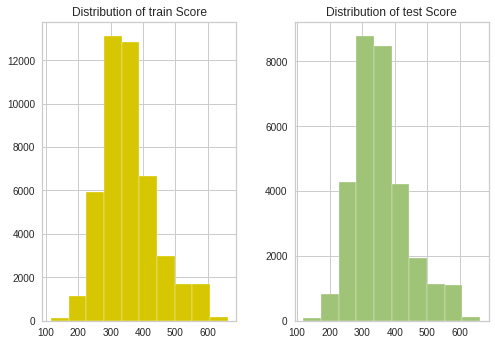

In [ ]:
def draw_distribution_Score(train_Score,test_Score):
  fig,ax=plt.subplots(1,2)
  train_Score.hist(figsize=(5,5),ax=ax[0],color='y')
  test_Score.hist(figsize=(5,5),ax=ax[1],color='g')
  ax[0].set_title('Distribution of train Score')
  ax[1].set_title('Distribution of test Score')
  plt.show()
draw_distribution_Score(Train_score,Test_score)

* The two graph shows that the range of score distribution: non-negative and almost reaches to normal distribution standard. 
 This also demonstrates that all customer are similar in some criteria that means they are not too different from each other. Not too many clients
are above higher than 400 or lower than 300. 
* This can be considered as good news to banks since customers are not too much different from each other
* => Hence, banks and other financial institution can stay focused on most of customers and can implement some plans for attracting or improving services without concerning too much on which plan should be used for a certain customers or being worried about if there are too many clusters
of customers, then how banks management can distribute budget to each of cluste